# Name : Sunita Samantasinghar
### Post Graduate Program in Artificial Intelligence and Machine Learning
2022-2023

# Featurization, Model Selection & Tuning
## Part A
### • CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of 
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

#### IMPORT ALL THE REQUIRED PACKAGES

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Q1 A - Import ‘signal-data.csv’ as DataFrame.

In [2]:
signal_data=pd.read_csv(r'C:\Users\Datta\Downloads\signal-data.csv')
signal_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
signal_data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [4]:
signal_data.shape

(1567, 592)

#### Q1 - Print 5 point summary and share at least 2 observations.

In [5]:
signal_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [6]:
signal_data.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

In [7]:
Counter(signal_data['Pass/Fail'])

Counter({-1: 1463, 1: 104})

**Observations :**
- 104 vlaues belong to the fail Category and 1463 to Pass.

#### Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [8]:
perc = 20.0                                                                      #Answer
min_count =  int(((100-perc)/100)*signal_data.shape[0] + 1)
signal_df_modified = signal_data.dropna( axis=1, thresh=min_count)

for i in signal_df_modified.columns[signal_df_modified.isnull().any(axis=0)]:     
    signal_df_modified[i].fillna(signal_df_modified[i].mean(),inplace= True)
signal_df_modified.shape

C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\3450448008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df_modified[i].fillna(signal_df_modified[i].mean(),inplace= True)


(1567, 560)

In [9]:
signal_df_modified.isna().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 560, dtype: int64

#### Q2 B - Identify and drop the features which are having same value for all the rows.

In [10]:
signal_df_modified.drop('Time', axis= 1, inplace= True)

C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\1878644053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df_modified.drop('Time', axis= 1, inplace= True)


In [11]:
signal_df_modified.shape

(1567, 559)

In [12]:
signal_df_modified.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [13]:
signal_df_modified_dup_cols_removed = signal_df_modified.T.drop_duplicates().T

In [14]:
signal_df_modified_dup_cols_removed.shape

(1567, 447)

In [15]:
signal_df_modified_dup_cols_removed.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=447)

In [16]:
def getDuplicateColumns(df):                    #Alternate solution 
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x & y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [17]:
duplicateColumnNames = getDuplicateColumns(signal_df_modified)
print('Duplicate Columns are as follows')
counter= 0
for col in duplicateColumnNames:
    print('Column name : ', col)
    counter= counter+ 1
print(counter)

Duplicate Columns are as follows
Column name :  226
Column name :  97
Column name :  394
Column name :  450
Column name :  402
Column name :  458
Column name :  263
Column name :  328
Column name :  329
Column name :  69
Column name :  262
Column name :  533
Column name :  234
Column name :  537
Column name :  141
Column name :  538
Column name :  52
Column name :  397
Column name :  395
Column name :  190
Column name :  449
Column name :  503
Column name :  461
Column name :  462
Column name :  380
Column name :  504
Column name :  373
Column name :  401
Column name :  534
Column name :  498
Column name :  266
Column name :  531
Column name :  236
Column name :  264
Column name :  515
Column name :  375
Column name :  535
Column name :  326
Column name :  381
Column name :  229
Column name :  243
Column name :  536
Column name :  237
Column name :  369
Column name :  466
Column name :  193
Column name :  232
Column name :  514
Column name :  325
Column name :  379
Column name :  260
C

#### Q2 C - Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [18]:
signal_df_modified_dup_cols_removed.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 447, dtype: int64

In [19]:
signal_df_modified_dup_cols_removed.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


#### Q2 D - Check for multi-collinearity in the data and take necessary action.

In [20]:
signal_df_modified_dup_cols_removed.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail    float64
Length: 447, dtype: object

In [21]:
vif = []
for feature in range(signal_df_modified_dup_cols_removed.shape[1]):
    vif.append(variance_inflation_factor(exog= signal_df_modified_dup_cols_removed.values, exog_idx= feature ))
print(vif)

C:\Users\Datta\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Datta\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Datta\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[14.379405943207416, 9.875504742152348, 27.522823447817878, 11.514404190956343, 42292.25270867556, 0.0, 8.36915549184977, 2.0229608296592163, 7.771432010556485, 1.7382598820753248, 1.6322033539077891, 19.662184281926113, 2597.544710917795, nan, 14.34844623083368, 6.574444985283025, 1481.6387694741306, 23.28664751754832, 1910.3487666073877, 12.71541519328672, 2.128994156736225, 15.389394107967858, 17.12001607158198, 1.500599672298338, 1.5652386438853054, 107.15848348507227, 62.11992410037347, 63.248832744540216, 15.873791085245573, 8.69762500289919, 12.299090883718412, 30.248875401397573, 51.44180993642527, 11.796446815513722, 2552966941.3374767, 51.166286174750944, 2552930761.679107, 108.5971565547916, 15.365311979015214, 12.92135565901605, 1.8035701559252542, 1.7134667362219536, 0.0, 15673689691.0244, 26.601905015655802, 24842923094.66688, 2457.7732665210738, 15.201741305582608, 8253354373.018251, 0.0, 30127535813.883686, 21.67200828734889, 14618.297123684077, 15307.591711572357, 5.70

In [22]:
len(vif)

447

In [23]:
signal_df_vif = pd.DataFrame({'feature_name': signal_df_modified_dup_cols_removed.columns, 'vif' : np.around(vif, 2)})
signal_df_vif.head(10)

,feature_name,vif
0,0,14.38
1,1,9.88
2,2,27.52
3,3,11.51
4,4,42292.25
5,5,0.00
6,6,8.37
7,7,2.02
8,8,7.77
9,9,1.74


In [24]:
signal_df_vif[signal_df_vif['vif'] < 10].count()

feature_name    80
vif             80
dtype: int64

In [25]:
signal_df_vif_removed_1 = signal_df_modified_dup_cols_removed[['1',   # Answer  #There are 80 columns/features which has Variance Inflation Factor
                        # Less than VIF (Industry Practice)threshold 10 value. Hence, considering those feature finally
'5',
'6',
'7',
'8',
'9',
'10',
'15',
'20',
'23',
'24',
'29',
'40',
'41',
'42',
'49',
'55',
'58',
'59',
'71',
'75',
'76',
'77',
'78',
'79',
'80',
'81',
'82',
'83',
'84',
'87',
'88',
'91',
'95',
'101',
'102',
'103',
'107',
'108',
'113',
'116',
'118',
'125',
'126',
'128',
'129',
'130',
'316',
'367',
'368',
'418',
'419',
'432',
'433',
'438',
'468',
'476',
'482',
'483',
'484',
'485',
'486',
'487',
'488',
'489',
'499',
'500',
'510',
'511',
'521',
'544',
'546',
'547',
'563',
'570',
'571',
'582',
'586',
'589',
'Pass/Fail']]

In [26]:
signal_df_vif_removed_1.shape

(1567, 80)

In [27]:
signal_df_vif_removed_1['Time'] = signal_data['Time']

C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\3674740737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df_vif_removed_1['Time'] = signal_data['Time']


In [28]:
signal_df_vif_removed_1.head()

,1,5,6,7,8,9,10,15,20,23,...,546,547,563,570,571,582,586,589,Pass/Fail,Time
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0,2008-07-19 11:55:00
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0,2008-07-19 12:32:00
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0,2008-07-19 13:17:00
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0,2008-07-19 14:43:00
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0,2008-07-19 15:22:00


#### Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [29]:
signal_df_vif_removed_1['year'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).year
signal_df_vif_removed_1['month'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).month
signal_df_vif_removed_1['date'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).day
signal_df_vif_removed_1['week_day'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).weekday
signal_df_vif_removed_1['start_time'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).time
signal_df_vif_removed_1['hour'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).hour
signal_df_vif_removed_1['min'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).minute

C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\2852103798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df_vif_removed_1['year'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).year
C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\2852103798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df_vif_removed_1['month'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).month
C:\Users\Datta\AppData\Local\Temp\ipykernel_11448\2852103798.py:3: SettingWithCopyWarning: 
A value is try

In [30]:
signal_df_vif_removed_1['Pass/Fail'].value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [31]:
signal_df_vif_removed_1.head()

,1,5,6,7,8,9,10,15,20,23,...,589,Pass/Fail,Time,year,month,date,week_day,start_time,hour,min
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,99.670066,-1.0,2008-07-19 11:55:00,2008,7,19,5,11:55:00,11,55
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,208.204500,-1.0,2008-07-19 12:32:00,2008,7,19,5,12:32:00,12,32
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,82.860200,1.0,2008-07-19 13:17:00,2008,7,19,5,13:17:00,13,17
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,73.843200,-1.0,2008-07-19 14:43:00,2008,7,19,5,14:43:00,14,43
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,73.843200,-1.0,2008-07-19 15:22:00,2008,7,19,5,15:22:00,15,22


#### Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

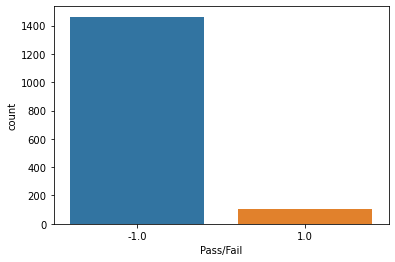

In [32]:
sns.countplot(data= signal_df_vif_removed_1, x= signal_df_vif_removed_1['Pass/Fail'])

- There is imbalance in the output.
- 1463 values are pass whereas 104 as fail.
- The data is more towards pass.

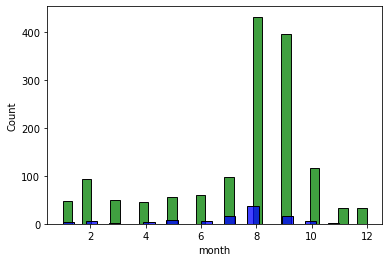

In [33]:
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == -1]['month'], color = 'g');
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == 1]['month'], color = 'b');

- The failures tend to decrease towards month end.

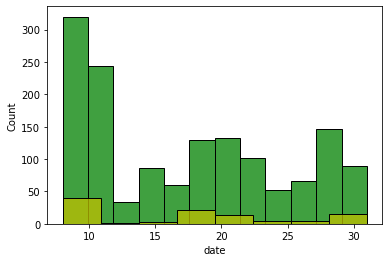

In [34]:
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == -1]['date'], color = 'g');
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == 1]['date'], color = 'y');

#### Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

Text(0.5, 1.0, 'Correlation heatmap for the Data')

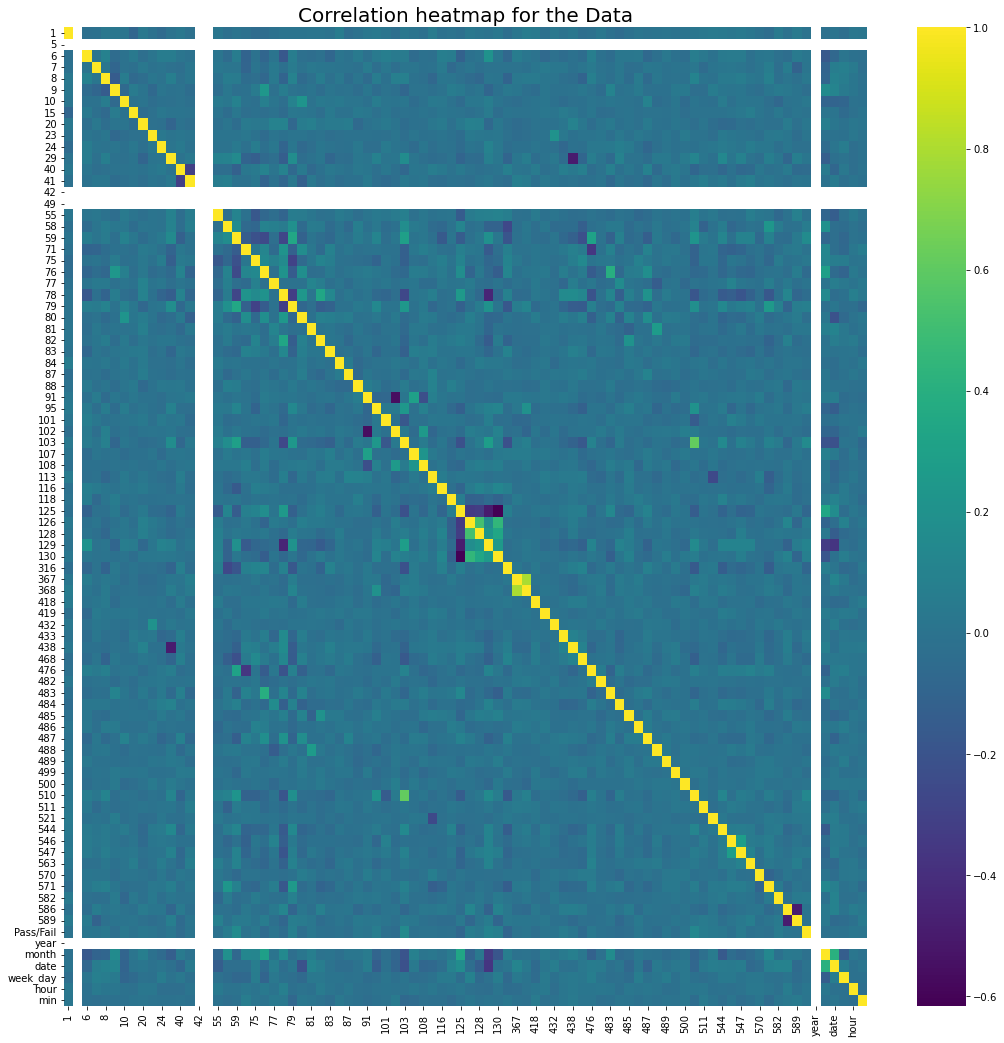

In [35]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(signal_df_vif_removed_1.corr(), cmap = "viridis")
plt.title('Correlation heatmap for the Data', fontsize = 20)

- 410 have very strong correlation with features like 367
- 78, 587, 129 have very less correlation.

#### Q4 A - Segregate predictors vs target attributes.

In [36]:
backup_df = signal_df_vif_removed_1.copy(deep= True)
backup_df.drop(['Time','year','month','date','week_day','hour','min','start_time'], axis= 1, inplace= True)
backup_df.head()

,1,5,6,7,8,9,10,15,20,23,...,544,546,547,563,570,571,582,586,589,Pass/Fail
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0


In [37]:
backup_df = backup_df.T.reset_index(drop=True).T

In [38]:
backup_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0


In [39]:
backup_df.rename(columns= {79: 'Pass/Fail'}, inplace= True)

In [40]:
X = backup_df.drop(labels= ['Pass/Fail'], axis= 1)
y = backup_df['Pass/Fail']

In [41]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200


In [42]:
y.head()

0   -1.0
1   -1.0
2    1.0
3   -1.0
4   -1.0
Name: Pass/Fail, dtype: float64

#### Q4 B - Check for target balancing and fix it if found imbalanced.

In [43]:
y.value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [44]:
str1 = str((1463/1567)*100)
str2 = str((104/1567)*100)

In [45]:
print('-1 class percentage is ' + str1)
print('1 class percentage is ' + str2)

-1 class percentage is 93.36311423101468
1 class percentage is 6.636885768985322


In [46]:
ros = RandomOverSampler()

In [47]:
X_os, y_os = ros.fit_resample(X, y)

In [48]:
print(X.shape)
print(y.shape)
print(X_os.shape)
print(y_os.shape)

(1567, 79)
(1567,)
(2926, 79)
(2926,)


In [49]:
y_os.value_counts()

-1.0    1463
 1.0    1463
Name: Pass/Fail, dtype: int64

#### Q4 C - Perform train-test split and standardise the data or vice versa if required.

In [50]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split (X_os, y_os,  test_size= 0.20, random_state= 2)

In [51]:
scaler_os_for_full_X = StandardScaler()

In [52]:
scaler_os_for_full_X.fit(X_os)

StandardScaler()

In [53]:
scaled_features_full_X = scaler_os_for_full_X.transform(X_os)
scaled_features_full_X

array([[ 0.88273545,  0.        , -0.6246737 , ...,  0.03164908,
         0.03376977, -0.01419913],
       [-0.39487377,  0.        ,  0.20192038, ...,  0.42654937,
        -0.95394877,  1.18118708],
       [ 0.83026637,  0.        , -0.99611677, ..., -1.29408763,
         3.11072662, -0.19934113],
       ...,
       [-0.02552245,  0.        ,  2.73122835, ..., -0.89918733,
        -1.80353256, -1.11195418],
       [-0.08962261,  0.        ,  0.17221192, ...,  0.31372072,
        -0.88731475, -0.23299627],
       [-0.61159951,  0.        ,  0.53725893, ..., -0.27862973,
         1.62811961, -0.38317946]])

In [54]:
Full_X_scaled_df = pd.DataFrame(scaled_features_full_X, columns= [0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] ) 

In [55]:
Full_X_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.882735,0.0,-0.624674,0.332161,0.502425,1.224582,-0.438240,0.142539,-0.213230,-0.207829,...,-0.152084,0.274933,0.087858,-1.968110,0.039391,0.177390,0.014423,0.031649,0.033770,-0.014199
1,-0.394874,0.0,0.201920,0.406943,0.445029,0.064962,-1.617510,0.132531,-1.493156,0.182786,...,-0.152084,0.274933,0.941593,1.144195,0.039391,0.243486,1.051351,0.426549,-0.953949,1.181187
2,0.830266,0.0,-0.996117,0.317204,-0.334962,0.384378,0.047950,0.277386,0.404446,-0.210158,...,-0.152084,0.274933,-0.696639,1.694284,2.333228,0.243945,-0.249475,-1.294088,3.110727,-0.199341
3,-0.204124,0.0,0.532803,-0.041751,0.321408,-0.761354,-0.427895,0.687243,-0.308746,-0.545585,...,-0.152084,0.274933,0.391212,-7.320296,-0.253452,-0.008580,-0.262348,-0.391458,-0.071048,-0.298653
4,0.092727,0.0,-0.138259,0.227465,0.540688,-0.115577,-0.831330,0.562646,-1.091985,-0.167513,...,-0.152084,0.274933,1.267244,-0.946046,0.039391,0.073434,-0.255268,-5.750820,-0.071048,-0.298653


In [56]:
scaler_os = StandardScaler()
scaler_os.fit(X_os_train)

StandardScaler()

In [57]:
scaled_features_X_os_train = scaler_os.transform(X_os_train)
scaled_features_X_os_test = scaler_os.transform(X_os_test)

In [58]:
scaled_features_X_os_train 

array([[-2.60229417,  0.        ,  0.7976838 , ..., -0.96470588,
        -1.73987502, -1.12752203],
       [-0.6814939 ,  0.        , -0.76616686, ...,  0.50638213,
         0.55187511, -0.25026822],
       [-0.50298331,  0.        ,  0.5185069 , ..., -0.0311308 ,
        -1.39186852,  3.24039003],
       ...,
       [ 0.10263526,  0.        , -0.18704425, ..., -1.38905819,
         0.577339  , -0.95581162],
       [-0.6814939 ,  0.        , -0.76616686, ...,  0.50638213,
         0.55187511, -0.25026822],
       [ 1.23719849,  0.        ,  0.50735296, ...,  0.42151167,
        -0.0507703 , -0.25191784]])

In [59]:
scaled_features_X_os_test

array([[-0.18350865,  0.        ,  0.369978  , ..., -2.52066436,
        -0.89956664,  1.24886187],
       [-0.60047249,  0.        ,  0.60843008, ..., -2.06802189,
         1.00173717, -0.32423298],
       [-0.21012056,  0.        ,  0.57576376, ..., -0.28574218,
        -1.14571758,  0.56078721],
       ...,
       [ 1.81870826,  0.        ,  0.12287947, ..., -1.04957634,
        -0.73829534, -0.26892617],
       [-0.91599489,  0.        , -0.64511642, ..., -0.20087172,
         0.16991675, -0.10084179],
       [-1.75650969,  0.        ,  0.8660946 , ..., -1.10615665,
         1.06115291, -0.84510478]])

In [60]:
X_os_train_scaled_df = pd.DataFrame(scaled_features_X_os_train, columns= [0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] )

In [61]:
X_os_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-2.602294,0.0,0.797684,-0.245040,0.275558,-0.042964,0.754467,-0.570777,1.150719,-0.061413,...,-0.149887,0.282591,0.361418,-0.745969,-1.113123,-0.001667,0.931091,-0.964706,-1.739875,-1.127522
1,-0.681494,0.0,-0.766167,0.156539,-0.914127,0.191010,0.170438,-0.775235,0.703290,0.114569,...,-0.149887,-0.080777,0.013843,-0.088867,-1.113123,0.254818,-0.731292,0.506382,0.551875,-0.250268
2,-0.502983,0.0,0.518507,0.056145,-3.517663,2.275500,0.805698,-0.184605,0.326172,0.102389,...,-0.149887,0.282591,0.013843,-0.088867,-1.113123,0.367046,-0.048545,-0.031131,-1.391869,3.240390
3,-1.229146,0.0,0.181866,0.558119,0.269697,-2.212535,0.908159,-0.646972,-0.146824,-0.597560,...,-0.149887,0.282591,-1.323030,0.199478,0.938463,0.237951,-0.621047,-0.229162,0.059573,0.136726
4,0.261385,0.0,0.071001,-0.161377,0.370791,-0.064234,1.522926,-0.025606,0.505144,-0.011863,...,-0.149887,-2.624354,0.013843,-0.088867,1.789171,0.002303,-0.286443,0.251771,0.093525,0.064788


In [62]:
X_os_test_scaled_df = pd.DataFrame(scaled_features_X_os_test, columns= [0,1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] )

In [63]:
X_os_test_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.183509,0.0,0.369978,0.323864,0.058719,-0.298207,1.010620,0.703893,-0.018987,0.343430,...,-0.149887,0.282591,0.713158,1.000697,1.119728,0.279011,-0.645224,-2.520664,-0.899567,1.248862
1,-0.600472,0.0,0.608430,0.190004,-1.816647,-1.907661,0.774959,0.647358,0.850303,-0.278510,...,-0.149887,0.282591,0.013843,-0.088867,-0.343778,0.252206,-1.341510,-2.068022,1.001737,-0.324233
2,-0.210121,0.0,0.575764,0.089610,-0.404262,-0.106774,0.928651,-0.222119,-1.904579,-0.063018,...,-0.149887,0.282591,0.013843,-0.088867,-1.113123,-1.234332,-0.127200,-0.285742,-1.145718,0.560787
3,0.611819,0.0,0.703922,-0.629886,-0.612311,0.517155,-0.434083,-0.570324,1.610931,1.295886,...,-0.149887,0.645959,-0.543554,-0.759081,-1.699144,0.184346,-0.502098,-0.766675,2.079709,-0.950850
4,0.079317,0.0,-0.747335,0.056145,2.115761,-1.205740,0.149946,-0.688593,0.805560,-0.154990,...,-0.149887,-1.170882,-0.620716,-0.954352,-0.367466,0.185550,0.398561,-1.021286,0.195381,-0.463628


#### Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [64]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
count,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,2495.850231,100.0,101.112908,0.121822,1.462862,-0.000841,0.000146,413.086035,1.405054,-3806.299734,...,11.610080,0.002509,1.039630,403.546477,0.679641,530.523623,2.101836,0.500096,0.021458,99.670066
std,80.227793,0.0,6.209271,0.008936,0.073849,0.015107,0.009296,17.204591,0.016737,1379.280537,...,103.122996,0.000295,0.355303,4.624446,0.110637,17.499736,0.275112,0.003403,0.012354,93.861936
min,2158.750000,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,333.448600,1.179700,-9986.750000,...,0.000000,0.001600,0.444400,372.822000,0.304900,317.196400,0.980200,0.477800,-0.016900,0.000000
25%,2452.885000,100.0,97.937800,0.121100,1.411250,-0.010800,-0.005600,406.131000,1.396500,-4370.625000,...,0.000000,0.002400,0.814100,400.814000,0.567100,530.702700,1.982900,0.497900,0.013450,44.368600
50%,2498.910000,100.0,101.492200,0.122400,1.461600,-0.001300,0.000400,412.262900,1.406000,-3819.750000,...,0.000000,0.002600,1.039630,403.546477,0.679641,532.398200,2.118600,0.500200,0.020500,72.023000
75%,2538.745000,100.0,104.530000,0.123800,1.516850,0.008400,0.005900,419.082800,1.415000,-3356.375000,...,0.000000,0.002600,1.216500,406.763000,0.738250,534.356400,2.290650,0.502350,0.027600,114.749700
max,2846.440000,100.0,129.252200,0.128600,1.656400,0.074900,0.053000,824.927100,1.453400,2363.000000,...,1000.000000,0.004700,3.978600,421.702000,1.298800,589.508200,2.739500,0.509800,0.102800,737.304800


In [65]:
X_os_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
count,2340.000000,2340.0,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,...,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,2494.829382,100.0,101.200523,0.122064,1.466092,-0.001394,0.000837,412.838405,1.405697,-3769.361451,...,19.881217,0.002522,1.034876,403.926029,0.675179,530.632886,2.108160,0.500410,0.020998,100.406413
std,75.922086,0.0,5.783949,0.005978,0.068268,0.014107,0.009762,11.910174,0.015648,1402.901008,...,132.669672,0.000275,0.343509,4.271906,0.097116,18.116084,0.310284,0.003536,0.011784,89.069545
min,2162.870000,100.0,82.131100,0.000000,1.191000,-0.053400,-0.032900,389.467100,1.179700,-9986.750000,...,0.000000,0.001600,0.444400,372.822000,0.304900,317.196400,0.984700,0.477800,-0.016900,0.000000
25%,2456.310000,100.0,98.590000,0.121100,1.419300,-0.010000,-0.005325,406.610100,1.396900,-4392.625000,...,0.000000,0.002400,0.803500,400.814000,0.567100,530.935400,1.990200,0.498100,0.013400,44.220475
50%,2498.720000,100.0,101.587800,0.122200,1.465000,-0.001300,0.001300,412.305350,1.406750,-3808.708350,...,0.000000,0.002600,1.039630,403.546477,0.679641,532.254500,2.172800,0.500500,0.020100,73.865700
75%,2534.160000,100.0,104.336700,0.123700,1.512925,0.006600,0.006900,418.710900,1.415900,-3278.937500,...,0.000000,0.002600,1.186900,407.010000,0.717800,534.447300,2.307775,0.502600,0.027600,121.635400
max,2846.440000,100.0,129.252200,0.128600,1.656400,0.060900,0.053000,824.927100,1.450300,2363.000000,...,1000.000000,0.004700,3.978600,421.702000,1.225400,570.962700,2.739500,0.509800,0.102800,737.304800


In [66]:
X_os_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
count,586.000000,586.0,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2499.151059,100.0,101.137272,0.121639,1.467432,-0.001601,0.000836,413.294494,1.406953,-3691.559555,...,22.922864,0.002534,1.018784,403.970376,0.678287,531.065907,2.101463,0.500299,0.021272,103.166918
std,82.981605,0.0,5.478679,0.008977,0.066769,0.015543,0.009295,18.983865,0.015912,1364.822205,...,142.865025,0.000272,0.330318,4.169637,0.098951,15.660476,0.312957,0.003588,0.012872,97.499609
min,2158.750000,100.0,83.170000,0.000000,1.295600,-0.047200,-0.034900,333.448600,1.349300,-9141.500000,...,0.000000,0.001600,0.458400,383.906000,0.510200,317.196400,0.980200,0.480000,-0.006000,0.000000
25%,2458.150000,100.0,98.682200,0.120800,1.424000,-0.009775,-0.005075,406.308150,1.396425,-4295.250000,...,0.000000,0.002500,0.803500,400.814000,0.591400,530.770900,1.990200,0.498100,0.013900,43.672175
50%,2500.850000,100.0,101.147800,0.122200,1.466300,-0.001200,0.001350,412.062300,1.406900,-3771.250000,...,0.000000,0.002600,1.039630,403.546477,0.679641,532.074500,2.162800,0.500300,0.020700,72.243500
75%,2545.755000,100.0,104.239700,0.123700,1.513400,0.007325,0.006700,418.738400,1.418875,-3134.187500,...,0.000000,0.002600,1.175050,407.010000,0.717800,534.417075,2.300200,0.502700,0.027800,125.823125
max,2806.910000,100.0,123.424400,0.127600,1.648600,0.074900,0.028500,817.003000,1.453400,1932.500000,...,1000.000000,0.003400,2.865400,417.628000,1.298800,589.508200,2.739500,0.509100,0.102800,737.304800


In [67]:
y.describe()

count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [68]:
y_os_train.describe().T

count    2340.000000
mean       -0.011111
std         1.000152
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [69]:
y_os_test.describe().T

count    586.000000
mean       0.044369
std        0.999869
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Pass/Fail, dtype: float64

In [70]:
print('Test and Train data have similar statistical charecteristics with original data.')

Test and Train data have similar statistical charecteristics with original data.


#### Q5 A - Use any Supervised Learning technique to train a model.

In [71]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
knn.fit(X_os_train_scaled_df, y_os_train)

KNeighborsClassifier(weights='distance')

In [72]:
knn_predictions = knn.predict(X_os_test_scaled_df)

In [73]:
print(confusion_matrix(y_os_test, knn_predictions))

[[224  56]
 [  0 306]]


In [74]:
print(classification_report(y_os_test, knn_predictions))

              precision    recall  f1-score   support

        -1.0       1.00      0.80      0.89       280
         1.0       0.85      1.00      0.92       306

    accuracy                           0.90       586
   macro avg       0.92      0.90      0.90       586
weighted avg       0.92      0.90      0.90       586



- We got 90% accuracy.
- Got 90% recall and 92% precision.

#### Q5 B - Use cross validation techniques.

In [75]:
knn_tuning = KNeighborsClassifier()
knn_tuning_leaf_size = list(range(1,15))
knn_tuning_no_of_neighbors = list(range(1,12))
knn_tuning_P = [1,2]

In [76]:
knn_tuning_hyperparameters = dict(leaf_size= knn_tuning_leaf_size, 
                                  n_neighbors= knn_tuning_no_of_neighbors,
                                  p= knn_tuning_P)

In [77]:
knn_tuning_hyperparameters

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'p': [1, 2]}

- **Grid Search CV**

In [78]:
knn_GS_classifier = GridSearchCV(knn_tuning, knn_tuning_hyperparameters, cv= 5)
knn_tuning_GS_best_model = knn_GS_classifier.fit(X_os_train_scaled_df, y_os_train)
df_knn_tuning_GS_model_results = pd.DataFrame(knn_tuning_GS_best_model.cv_results_)

In [79]:
df_knn_tuning_GS_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015046,0.002583,0.280585,0.018081,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.955128,0.946581,0.957265,0.965812,0.961538,0.957265,0.006481,1
1,0.006896,0.005701,0.249663,0.026297,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.940171,0.944444,0.955128,0.961538,0.946581,0.949573,0.007716,29
2,0.015187,0.001491,0.290103,0.006167,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.950855,0.946581,0.950855,0.965812,0.961538,0.955128,0.007278,15
3,0.015626,0.000004,0.271320,0.008357,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.935897,0.944444,0.948718,0.961538,0.946581,0.947436,0.008287,43
4,0.011209,0.006171,0.286804,0.010093,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.895299,0.899573,0.910256,0.920940,0.918803,0.908974,0.010167,57


In [80]:
df_knn_tuning_GS_model_results[['param_leaf_size','param_n_neighbors','param_p','params','mean_test_score']]

,param_leaf_size,param_n_neighbors,param_p,params,mean_test_score
0,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.957265
1,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.949573
2,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.955128
3,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.947436
4,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.908974
...,...,...,...,...,...
303,14,9,2,"{'leaf_size': 14, 'n_neighbors': 9, 'p': 2}",0.815812
304,14,10,1,"{'leaf_size': 14, 'n_neighbors': 10, 'p': 1}",0.811111
305,14,10,2,"{'leaf_size': 14, 'n_neighbors': 10, 'p': 2}",0.811538
306,14,11,1,"{'leaf_size': 14, 'n_neighbors': 11, 'p': 1}",0.793162


In [81]:
print(knn_tuning_GS_best_model.best_estimator_)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


In [82]:
print(knn_tuning_GS_best_model.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]})>


In [83]:
print(knn_tuning_GS_best_model.best_score_)

0.9572649572649572


- **Randomized Search CV**

In [84]:
knn_RS_classifier = RandomizedSearchCV(knn_tuning, knn_tuning_hyperparameters, cv= 5)
knn_tuning_RS_best_model = knn_RS_classifier.fit(X_os_train_scaled_df, y_os_train)
df_knn_tuning_RS_model_results = pd.DataFrame(knn_tuning_RS_best_model.cv_results_)

In [85]:
df_knn_tuning_RS_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009376,0.007656,0.256230,0.030956,2,4,2,"{'p': 2, 'n_neighbors': 4, 'leaf_size': 2}",0.893162,0.897436,0.910256,0.927350,0.908120,0.907265,0.011905,4
1,0.013191,0.006647,0.296603,0.010445,1,2,4,"{'p': 1, 'n_neighbors': 2, 'leaf_size': 4}",0.950855,0.946581,0.950855,0.965812,0.961538,0.955128,0.007278,1
2,0.009790,0.007604,0.295446,0.008449,1,3,3,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 3}",0.895299,0.899573,0.910256,0.920940,0.918803,0.908974,0.010167,2
3,0.015051,0.002986,0.293605,0.006110,1,8,7,"{'p': 1, 'n_neighbors': 8, 'leaf_size': 7}",0.837607,0.839744,0.854701,0.858974,0.844017,0.847009,0.008396,6
4,0.012723,0.006376,0.267413,0.003954,2,8,4,"{'p': 2, 'n_neighbors': 8, 'leaf_size': 4}",0.835470,0.814103,0.856838,0.826923,0.839744,0.834615,0.014148,7


In [86]:
df_knn_tuning_RS_model_results[['param_leaf_size','param_n_neighbors','param_p','params','mean_test_score']]

,param_leaf_size,param_n_neighbors,param_p,params,mean_test_score
0,2,4,2,"{'p': 2, 'n_neighbors': 4, 'leaf_size': 2}",0.907265
1,4,2,1,"{'p': 1, 'n_neighbors': 2, 'leaf_size': 4}",0.955128
2,3,3,1,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 3}",0.908974
3,7,8,1,"{'p': 1, 'n_neighbors': 8, 'leaf_size': 7}",0.847009
4,4,8,2,"{'p': 2, 'n_neighbors': 8, 'leaf_size': 4}",0.834615
5,14,11,2,"{'p': 2, 'n_neighbors': 11, 'leaf_size': 14}",0.790171
6,13,3,2,"{'p': 2, 'n_neighbors': 3, 'leaf_size': 13}",0.908547
7,6,11,1,"{'p': 1, 'n_neighbors': 11, 'leaf_size': 6}",0.793162
8,11,5,1,"{'p': 1, 'n_neighbors': 5, 'leaf_size': 11}",0.875641
9,10,9,1,"{'p': 1, 'n_neighbors': 9, 'leaf_size': 10}",0.820085


In [87]:
print(knn_tuning_RS_best_model.best_estimator_)

KNeighborsClassifier(leaf_size=4, n_neighbors=2, p=1)


In [88]:
print(knn_tuning_RS_best_model.get_params)

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11],
                                        'p': [1, 2]})>


In [89]:
print(knn_tuning_RS_best_model.best_score_)

0.9551282051282051


#### Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

In [90]:
knn_GS_final_model_1_2_1 = KNeighborsClassifier(n_neighbors= 2, leaf_size= 1,  p= 1, weights = 'distance' )
knn_GS_final_model_1_2_1.fit(X_os_train_scaled_df, y_os_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1, weights='distance')

In [91]:
knn_GS_final_model_1_2_1_predictions = knn_GS_final_model_1_2_1.predict(X_os_test_scaled_df)

In [92]:
print(confusion_matrix(y_os_test, knn_GS_final_model_1_2_1_predictions))

[[264  16]
 [  0 306]]


In [93]:
print(classification_report(y_os_test, knn_GS_final_model_1_2_1_predictions))

              precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97       280
         1.0       0.95      1.00      0.97       306

    accuracy                           0.97       586
   macro avg       0.98      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



In [94]:
print('In KNN Final model, using GridSearch by changing parameters  we got 97% accuracy.')

In KNN Final model, using GridSearch by changing parameters  we got 97% accuracy.


**Now we will use Randomized Serach CV method**

In [95]:
knn_RS_final_model_6_1_1 = KNeighborsClassifier(n_neighbors= 1, leaf_size= 6,  p= 2, weights = 'distance' )

In [96]:
knn_RS_final_model_6_1_1.fit(X_os_train_scaled_df, y_os_train)
knn_RS_final_model_6_1_1_predictions = knn_RS_final_model_6_1_1.predict(X_os_test_scaled_df)

In [97]:
print(confusion_matrix(y_os_test, knn_RS_final_model_6_1_1_predictions))

[[258  22]
 [  0 306]]


In [98]:
print(classification_report(y_os_test, knn_RS_final_model_6_1_1_predictions))

              precision    recall  f1-score   support

        -1.0       1.00      0.92      0.96       280
         1.0       0.93      1.00      0.97       306

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.96      0.96      0.96       586



In [99]:
print('In KNN Final model, using RandomizedSearch by changing parameters  we got 97% accuracy.')

In KNN Final model, using RandomizedSearch by changing parameters  we got 97% accuracy.


#### Q5 D - Use any other technique/method which can enhance the model performance.

In [100]:
Full_X_scaled_df.shape

(2926, 79)

In [101]:
pca60 = PCA(n_components= 60)

In [102]:
pca60.fit(Full_X_scaled_df)

PCA(n_components=60)

In [103]:
pca60.score(Full_X_scaled_df, y_os)

-101.61264520821031

In [104]:
print(pca60.explained_variance_)

[4.43084397 2.8828739  2.32870278 2.22340859 2.13918953 2.01420101
 1.91238876 1.82428568 1.79663345 1.73542001 1.66133691 1.64273484
 1.58646516 1.48601549 1.41929435 1.3945083  1.36171431 1.34482665
 1.28300994 1.27041438 1.23374123 1.20029415 1.15693438 1.14000238
 1.09870115 1.0900127  1.05389528 1.04206187 1.03179238 1.00615517
 0.99694377 0.97118273 0.94804852 0.91177927 0.88236237 0.86279749
 0.859528   0.83937846 0.81964668 0.80950473 0.79786235 0.773438
 0.75325327 0.72658311 0.70998916 0.70407062 0.69376599 0.66983029
 0.65022688 0.64032563 0.62038162 0.61185256 0.6002072  0.58091182
 0.57283046 0.55365606 0.53387046 0.52694452 0.50451375 0.48485807]


In [105]:
print(pca60.components_)

[[-3.21443538e-02  5.55111512e-17 -7.24127979e-02 ...  3.62915854e-02
   9.39121797e-02 -1.10037080e-01]
 [-1.41312441e-02 -1.11022302e-16  7.23025111e-02 ... -5.32116772e-02
  -1.01822086e-01  1.00187161e-01]
 [ 1.79706631e-01 -1.11022302e-16  6.37471451e-02 ...  2.95565789e-02
   1.19056360e-01 -6.08336661e-02]
 ...
 [ 6.97157758e-02 -1.79554044e-16 -2.92618176e-01 ...  9.07449305e-02
  -6.05907400e-02 -6.76832295e-02]
 [ 4.61183018e-02 -6.75457953e-17  7.12758077e-02 ...  2.54170930e-01
   4.87708018e-02  9.26254933e-02]
 [-9.50755859e-02  3.82181266e-17 -5.51633756e-02 ... -9.99428602e-02
  -7.68434856e-02  2.59510882e-02]]


In [106]:
print(pca60.explained_variance_ratio_)

[0.05828065 0.03791959 0.03063035 0.02924538 0.02813761 0.02649359
 0.02515441 0.02399556 0.02363183 0.02282667 0.02185223 0.02160754
 0.02086741 0.01954615 0.01866854 0.01834252 0.01791117 0.01768904
 0.01687594 0.01671027 0.01622789 0.01578795 0.01521762 0.0149949
 0.01445165 0.01433737 0.0138623  0.01370665 0.01357158 0.01323436
 0.0131132  0.01277435 0.01247006 0.011993   0.01160606 0.01134872
 0.01130571 0.01104068 0.01078114 0.01064774 0.0104946  0.01017334
 0.00990784 0.00955704 0.00933877 0.00926092 0.00912538 0.00881054
 0.00855269 0.00842246 0.00816013 0.00804794 0.00789476 0.00764096
 0.00753467 0.00728246 0.00702221 0.00693111 0.00663607 0.00637753]


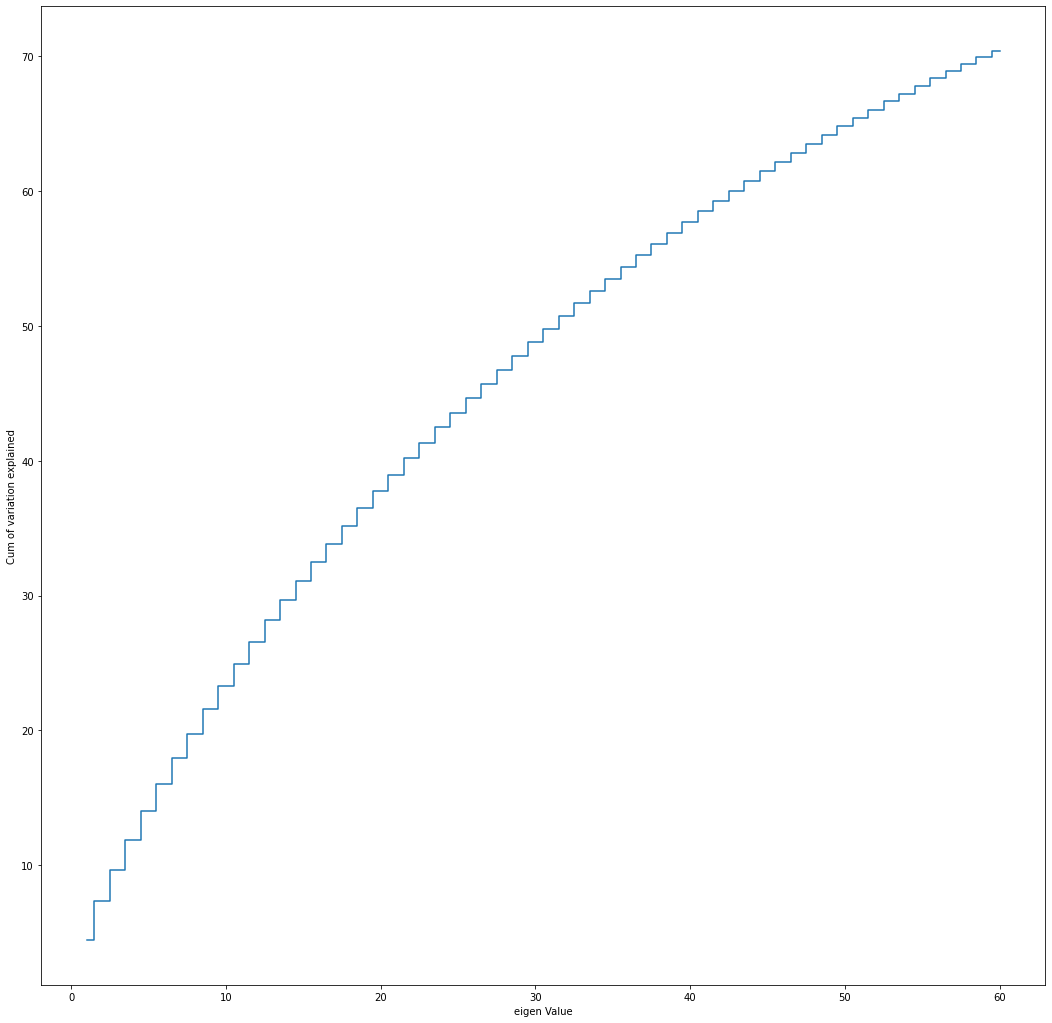

In [107]:
plt.step(list(range(1,61)),np.cumsum(pca60.explained_variance_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

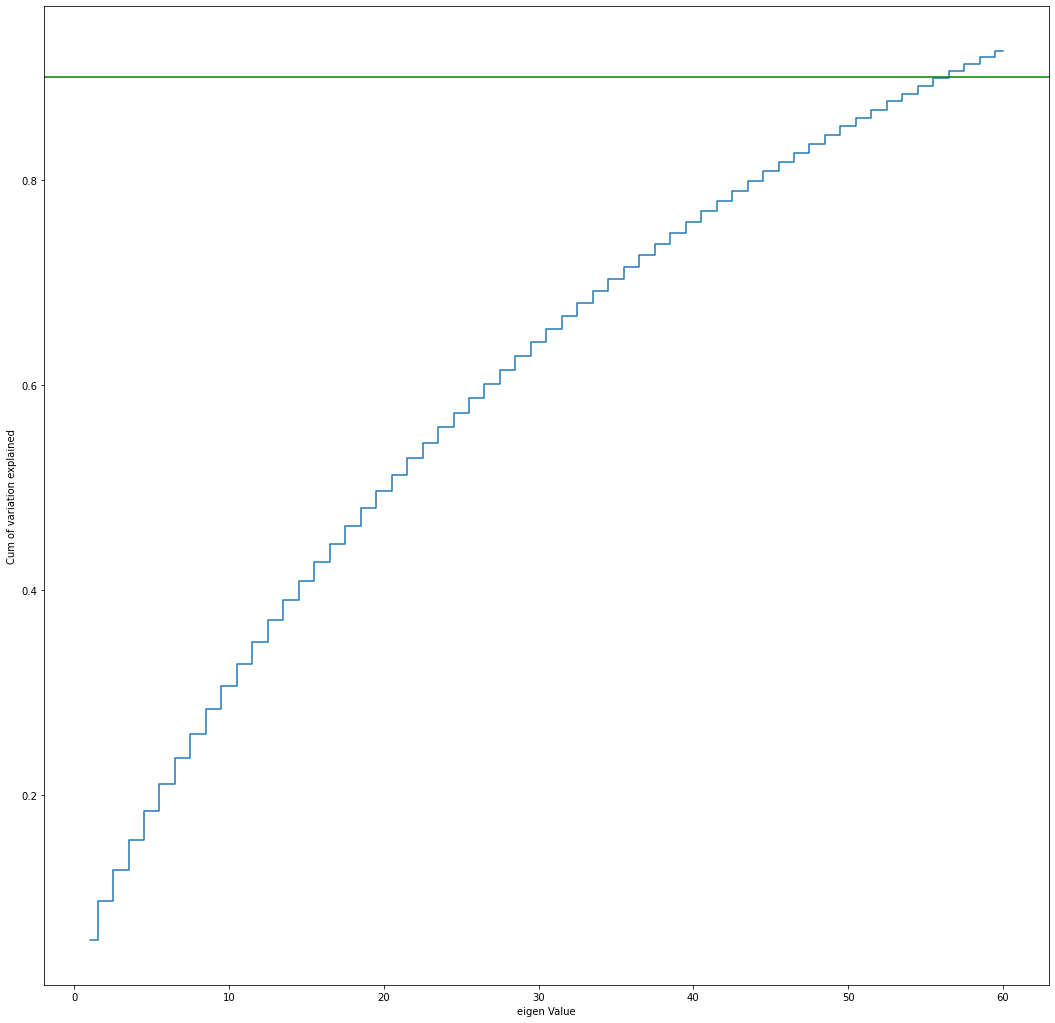

In [108]:
plt.step(list(range(1,61)),np.cumsum(pca60.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90, color='g', linestyle='-')         
plt.show()

In [109]:
print('The line cuts between principal components/eigen values 4 and 5')

The line cuts between principal components/eigen values 4 and 5


In [110]:
pca55 = PCA(n_components= 55)

In [111]:
pca55.fit(Full_X_scaled_df)

PCA(n_components=55)

In [112]:
print(pca55.components_)

[[-3.21436960e-02 -1.11022302e-16 -7.24116601e-02 ...  3.62909967e-02
   9.39128986e-02 -1.10036022e-01]
 [-1.41283338e-02 -1.11022302e-16  7.23053526e-02 ... -5.32083667e-02
  -1.01812150e-01  1.00199644e-01]
 [ 1.79707129e-01 -0.00000000e+00  6.37436142e-02 ...  2.95549077e-02
   1.19067803e-01 -6.08219921e-02]
 ...
 [ 1.41821761e-01 -5.82216567e-17 -1.62173398e-01 ... -1.08386281e-01
  -1.54848951e-01 -7.46183045e-02]
 [-1.89517793e-01  5.48606299e-17 -2.32192468e-01 ...  5.80051797e-02
   5.17192501e-03  7.34594054e-02]
 [ 4.88001534e-02  1.63660318e-16  1.57485017e-02 ...  5.29962945e-02
   1.87400453e-02  2.75792187e-02]]


In [113]:
print(pca55.explained_variance_)

[4.43084397 2.88287389 2.32870277 2.22340844 2.13918885 2.0141994
 1.91238783 1.82428489 1.79663184 1.7354187  1.66133294 1.64273088
 1.58646414 1.48600282 1.41928661 1.39450152 1.36168865 1.3448224
 1.2829822  1.27039704 1.23372239 1.20020778 1.15689695 1.13992548
 1.09865539 1.09004078 1.05365152 1.04197537 1.031731   1.00609238
 0.99679698 0.97104283 0.94788808 0.91148398 0.88209985 0.86267899
 0.85946872 0.83919369 0.81934149 0.80872861 0.79751143 0.77352666
 0.75209831 0.72622265 0.70899602 0.70234228 0.69245307 0.66902163
 0.64992641 0.63832479 0.61848324 0.61273648 0.59749065 0.57882827
 0.56485301]


In [114]:
print(pca55.explained_variance_ratio_)

[0.05828065 0.03791959 0.03063035 0.02924538 0.0281376  0.02649357
 0.0251544  0.02399554 0.02363181 0.02282665 0.02185217 0.02160749
 0.02086739 0.01954599 0.01866844 0.01834243 0.01791083 0.01768898
 0.01687558 0.01671004 0.01622764 0.01578681 0.01521713 0.01499389
 0.01445105 0.01433774 0.0138591  0.01370552 0.01357077 0.01323353
 0.01311127 0.01277251 0.01246795 0.01198911 0.01160261 0.01134716
 0.01130493 0.01103825 0.01077712 0.01063753 0.01048999 0.0101745
 0.00989265 0.0095523  0.00932571 0.00923819 0.00910811 0.00879991
 0.00854874 0.00839614 0.00813516 0.00805957 0.00785903 0.00761356
 0.00742974]


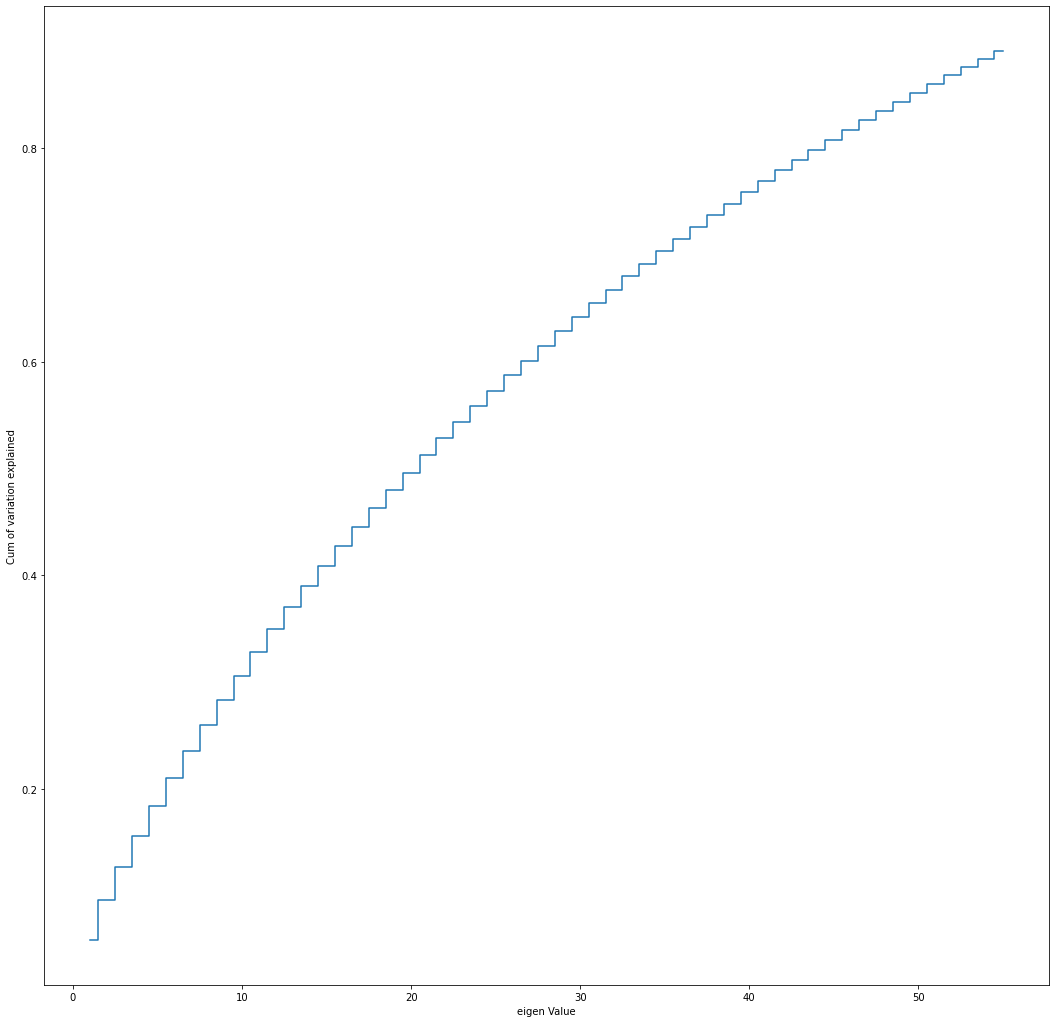

In [115]:
plt.step(list(range(1,56)),np.cumsum(pca55.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [116]:
Xpca55 = pca55.transform(Full_X_scaled_df)

In [117]:
pca55

PCA(n_components=55)

In [118]:
Xpca55

array([[-1.24949328e+00, -6.94635693e-03,  4.92467514e+00, ...,
        -6.08846548e-01,  9.44853157e-01, -3.14969601e-01],
       [-8.90409580e-01, -5.73071339e-01, -1.87245830e+00, ...,
         3.63092439e-03, -8.26726613e-01,  1.51563533e+00],
       [-3.28444750e+00, -1.88092042e+00,  1.28254426e+00, ...,
        -1.47726999e-01,  2.97244026e-01,  9.48509746e-01],
       ...,
       [ 1.24442695e+00,  1.50181222e+00,  2.99509124e+00, ...,
         9.20205623e-01, -2.79589481e-01, -3.08889924e-01],
       [ 3.77581389e-01,  1.49886741e+00, -2.14694467e+00, ...,
         4.34932502e-01, -2.27161014e-01,  1.72827737e-01],
       [ 1.15873912e+00,  6.70277082e-01, -1.38622443e+00, ...,
        -8.85552976e-01,  3.89633946e-01, -5.36733069e-01]])

In [119]:
tranformed_componenets = pd.DataFrame(Xpca55)
tranformed_componenets.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.249493,-0.006946,4.924675,2.484131,-1.630834,1.258626,1.208245,-2.406236,3.673841,2.104687,...,0.443476,1.626686,0.988174,-1.254064,-0.184631,1.845135,-0.726769,-0.608847,0.944853,-0.314970
1,-0.890410,-0.573071,-1.872458,3.062066,0.674967,-1.086651,0.599175,0.248148,0.793159,-0.626820,...,0.753168,-0.653709,-0.774428,-0.676487,0.066388,0.047739,-0.197665,0.003631,-0.826727,1.515635
2,-3.284448,-1.880920,1.282544,0.017945,1.648244,1.428980,-0.777690,1.707112,-0.893234,0.434927,...,-0.171450,0.263924,-0.073527,-0.313338,0.666139,-0.456755,0.168789,-0.147727,0.297244,0.948510
3,-1.849325,1.002147,0.789752,0.088160,-0.863459,0.000734,1.370823,-0.533012,-3.780278,-3.166223,...,-1.483614,0.001792,1.537312,-2.834219,-0.768787,0.296113,-1.189638,-0.715073,-0.352981,0.064616
4,-1.782653,-0.019872,-1.609149,-0.320865,-0.976026,1.659306,-0.192214,-0.267497,0.928086,-0.786226,...,-0.791719,-1.732541,-0.554419,-1.417036,-1.118786,0.036632,-0.334745,0.136686,-1.833226,-0.053308


#### Q5 E - Display and explain the classification report in detail.

In [120]:
KNN_PCA = KNeighborsClassifier(n_neighbors= 2, leaf_size= 1,  p= 1, weights = 'distance')
KNN_PCA.fit(Xpca55, y_os)

KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1, weights='distance')

In [121]:
KNN_PCA.score(Xpca55, y_os)

1.0

In [122]:
print('We got 100% score in-sample data.')

We got 100% score in-sample data.


#### Q5 F - Apply the above steps for all possible models that you have learnt so far.

**Logistic Regression :**

In [123]:
params_logistic = {'max_iter': [2000],                 #Answer
                   'penalty': ['l1', 'l2'],
                   'solver': ['liblinear']}
model_logistic = LogisticRegression()
final_tuning_logistic = GridSearchCV(model_logistic, params_logistic, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_logistic)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [2000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)


In [124]:
print(final_tuning_logistic.best_params_)

{'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


**K- Nearest :**

In [125]:
params_knn = {'n_neighbors' : range(1, 10),
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}
model_knn = KNeighborsClassifier()
final_tuning_knn = GridSearchCV(model_knn, params_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_knn.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


**SVM :**

In [126]:
params_svc = {'kernel': ['rbf'],
              'C' : [0.01, 0.1, 1, 10, 100, 1000 ],
              'gamma' : [1, 0.1, 0.001, 0.0001, 0.00001]}
model_svc = svm.SVC()
final_tuning_svc = GridSearchCV(model_svc, params_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_svc)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)


In [127]:
print(final_tuning_svc.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


**DecisionTree :**

In [128]:
params_dt = {'criterion': ['gini'],
             'max_depth': [3, 4, 5, 6, 7],
             'random_state': [0]}
model_dt = DecisionTreeClassifier()
final_tuning_dt = GridSearchCV(model_dt, params_dt, cv=5).fit(X_os_train_scaled_df, y_os_train)

In [129]:
print(final_tuning_dt.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'random_state': 0}


**Random Forest :**

In [130]:
params_rf = {'n_estimators': [95, 100, 105],
             'criterion':['entropy'],
             'bootstrap': [True, False],
             'max_depth': [40, 45, 50],
             'max_features': [4, 5, 6],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [9, 10, 11],
             'random_state': [734]}
model_rf = RandomForestClassifier()
final_tuning_rf = GridSearchCV(model_rf, params_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
final_tuning_rf.best_params_['random_state']=242
final_tuning_rf.best_estimator_.random_state=242
print(final_tuning_rf.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 95, 'random_state': 242}


**Bagging Classifier :**

In [131]:
params_bc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_bc = BaggingClassifier()
final_tuning_bc = GridSearchCV(model_bc, params_bc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_bc.best_params_)

{'n_estimators': 40, 'random_state': 0}


**Gardient Boosting :**

In [132]:
params_gbc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_gbc = GradientBoostingClassifier()
final_tuning_gbc = GridSearchCV(model_gbc, params_gbc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_gbc.best_params_)

{'n_estimators': 60, 'random_state': 0}


**Ada Boosting :** 

In [133]:
params_abc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_abc = AdaBoostClassifier()
final_tuning_abc = GridSearchCV(model_abc, params_abc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_abc.best_params_)

{'n_estimators': 60, 'random_state': 0}


**Pipelines :**

In [136]:
pl_LogisticRegression = Pipeline( [('Scalar1', StandardScaler()),
                                 ('lr_classifier', LogisticRegression(max_iter = 2000, penalty= 'l1', solver= 'liblinear'))] )

In [137]:
pl_KNeighborsClassifier = Pipeline( [('Scalar2', StandardScaler()),
                                 ('knn_classifier', KNeighborsClassifier(n_neighbors= 2, p= 1, weights= 'uniform'))] )
pl_SupportVectorClassifier = Pipeline( [('Scalar3', StandardScaler()),
                                 ('svc_classifier', svm.SVC(C= 1, gamma= 1, kernel= 'rbf'))] )
pl_DecisionTreeClassifier = Pipeline( [('Scalar4', StandardScaler()),
                                 ('dt_classifier', DecisionTreeClassifier(criterion = 'gini', random_state= 0)) ])
pl_RandomForestClassifier = Pipeline( [('Scalar5', StandardScaler()),
                                 ('rf_classifier', RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 40,
                                                                          max_features= 6, min_samples_leaf= 1, min_samples_split=10,
                                                                          n_estimators= 95, random_state= 242)) ])
pl_BaggingClassifier = Pipeline( [('Scalar6', StandardScaler()),
                                  ('bag_classifier', BaggingClassifier(n_estimators= 20, random_state= 0)) ])
pl_GradientBoostingClassifier = Pipeline( [('Scalar7', StandardScaler()),
                                  ('gb_classifier', GradientBoostingClassifier(n_estimators= 60, random_state= 0)) ])
pl_AdaBoostClassifier = Pipeline( [('Scalar8', StandardScaler()),
                                  ('ab_classifier', AdaBoostClassifier(n_estimators= 60, random_state= 0)) ])

In [138]:
best_accuracy = 0.0
best_classifier = 0
best_pipleine = ''

In [139]:
pipe_dict = {0 : 'Logistic Regression',                    #creating a dictionary for all the classifiers for mapping
             1 : 'K Nearest Neighbours',
             2 : 'Support vector Classifier',
             3 : 'Decision Tree Classifier',
             4 : 'Random Forest Classifier',
             5 : 'Bagging Classifier',
             6 : 'Gradient Boosting Classifier',
             7 : 'Ada Boost Classifier'}

In [141]:
pipe_lines = [pl_LogisticRegression,                      #Creating different ensemble models into a list
              pl_KNeighborsClassifier,
              pl_SupportVectorClassifier,
              pl_DecisionTreeClassifier,
              pl_RandomForestClassifier,
              pl_BaggingClassifier,
              pl_GradientBoostingClassifier,
              pl_AdaBoostClassifier]

In [142]:
for i, model in enumerate(pipe_lines):
    print(i)
    print(model)

0
Pipeline(steps=[('Scalar1', StandardScaler()),
                ('lr_classifier',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    solver='liblinear'))])
1
Pipeline(steps=[('Scalar2', StandardScaler()),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=2, p=1))])
2
Pipeline(steps=[('Scalar3', StandardScaler()),
                ('svc_classifier', SVC(C=1, gamma=1))])
3
Pipeline(steps=[('Scalar4', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier(random_state=0))])
4
Pipeline(steps=[('Scalar5', StandardScaler()),
                ('rf_classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=40,
                                        max_features=6, min_samples_split=10,
                                        n_estimators=95, random_state=242))])
5
Pipeline(steps=[('Scalar6', StandardScaler()),
                ('bag_classifier',
                 BaggingClassifier(n_

In [143]:
for pipe in pipe_lines:
    pipe.fit(X_os_train_scaled_df, y_os_train)

In [144]:
for i, model in enumerate(pipe_lines):
    print(str(pipe_dict[i]) + ' Testing Data Accuracy ' + str(model.score(X_os_test_scaled_df, y_os_test)) )

Logistic Regression Testing Data Accuracy 0.7389078498293515
K Nearest Neighbours Testing Data Accuracy 0.9726962457337884
Support vector Classifier Testing Data Accuracy 1.0
Decision Tree Classifier Testing Data Accuracy 0.9692832764505119
Random Forest Classifier Testing Data Accuracy 1.0
Bagging Classifier Testing Data Accuracy 0.9812286689419796
Gradient Boosting Classifier Testing Data Accuracy 0.9522184300341296
Ada Boost Classifier Testing Data Accuracy 0.89419795221843


#### Q6 A- Display and compare all the models designed with their train and test accuracies.

In [149]:
for i, model in enumerate(pipe_lines):
     print( 'Train data score is ' + str(model.score(X_os_train_scaled_df, y_os_train)))
     print('Test data score is ' + str(model.score(X_os_test_scaled_df, y_os_test)))
     print('\n')

Train data score is 0.7760683760683761
Test data score is 0.7389078498293515


Train data score is 1.0
Test data score is 0.9726962457337884


Train data score is 1.0
Test data score is 1.0


Train data score is 1.0
Test data score is 0.9692832764505119


Train data score is 1.0
Test data score is 1.0


Train data score is 1.0
Test data score is 0.9812286689419796


Train data score is 0.967948717948718
Test data score is 0.9522184300341296


Train data score is 0.9452991452991453
Test data score is 0.89419795221843




#### Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

In [150]:
for i, model in enumerate(pipe_lines):        #Answer      #Selecting and printing the best classifier based on test accuracy score
     if model.score(X_os_test_scaled_df, y_os_test) > best_accuracy:
         best_accuracy = model.score(X_os_test_scaled_df, y_os_test)
         print(best_accuracy)
         best_pipleine = model
         best_classifier = i

0.7389078498293515
0.9726962457337884
1.0


In [151]:
print('The best trained model is ' + pipe_dict[best_classifier] + ' with score of ' + str(best_accuracy) )

The best trained model is Support vector Classifier with score of 1.0


#### Q6 C - Pickle the selected model for future use.

In [152]:
import pickle

In [153]:
with open('best_model_svc_classifier', 'wb') as files:
    pickle.dump(pl_SupportVectorClassifier, files)

In [154]:
with open('best_model_svc_classifier' , 'rb') as files:
    ab = pickle.load(files)

In [155]:
print(ab)

Pipeline(steps=[('Scalar3', StandardScaler()),
                ('svc_classifier', SVC(C=1, gamma=1))])


#### Q6 D - Write your conclusion on the results.

- Grid Search CV results and using the best hyper parameters and using ensemble techniques we got best results.
- In Support Vector Classifier and Random Forest Classifiers. 
- The best and ideal results we got in Support Vector Classifier.